# Análise Exploratória dos Dados

## Objetivos

Realizar a Análise Exploratória dos Dados (EDA), isso inclui:

- Extração de `insights` relevantes;
- Verificar os `ataques` mais frenquentes em ambos os datasets;
- Identificar `portas de entrada` mais exploradas pelos invasores;
- Entender `estruturas`, `padrões` e `características` dos dados;
- Entender o `comportamento` dos dados.

## Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import os

### Dataset 2017

In [10]:
path_2017 = r"C:\Users\augus\Capstone-Data-Science-Project\dados\processados\IDS-2017-PROCESSADO.csv"
df_2017 = pd.read_csv(path_2017)
df_2017.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Tipos de Ataques
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [12]:
print(df_2017.dtypes)

Destination Port                 int64
Flow Duration                    int64
Total Fwd Packets                int64
Total Backward Packets           int64
Total Length of Fwd Packets      int64
                                ...   
Idle Mean                      float64
Idle Std                       float64
Idle Max                         int64
Idle Min                         int64
Tipos de Ataques                object
Length: 79, dtype: object


#### 1. Ataques mais Frequentes ✅

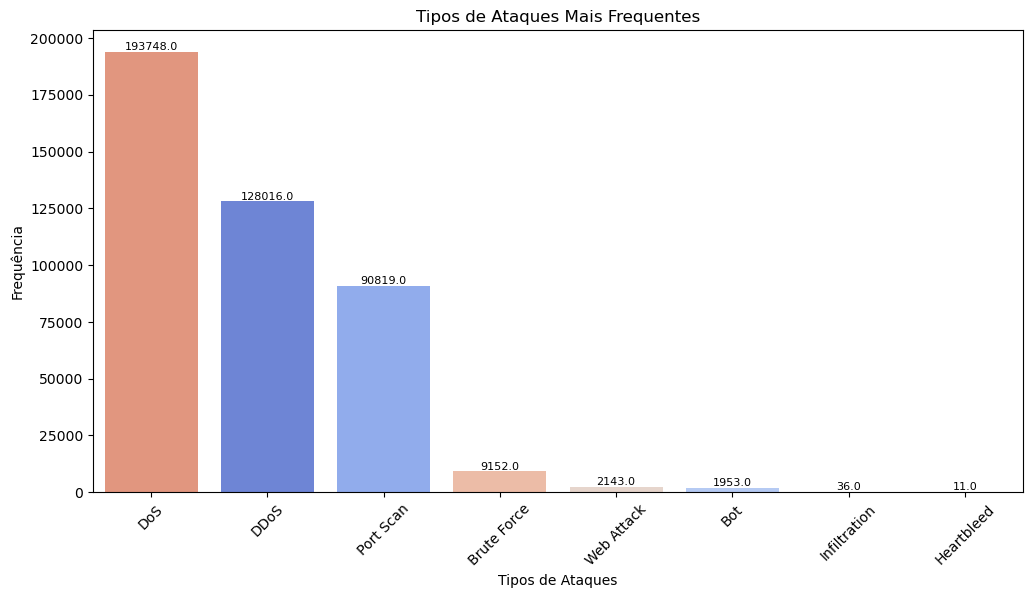

In [14]:
plt.figure(figsize=(12,6))
ax = sns.countplot(x=df_2017[df_2017['Tipos de Ataques'] != 'BENIGN']['Tipos de Ataques'], 
                   order=df_2017[df_2017['Tipos de Ataques'] != 'BENIGN']['Tipos de Ataques'].value_counts().index,
                   hue=df_2017[df_2017['Tipos de Ataques'] != 'BENIGN']['Tipos de Ataques'],
                   palette='coolwarm')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width()/2, p.get_height()), 
                ha='center', va='bottom', fontsize=8)

plt.xticks(rotation=45)
plt.title("Tipos de Ataques Mais Frequentes")
plt.xlabel("Tipos de Ataques")
plt.ylabel("Frequência")
plt.show()

#### 2. Tráfego Benigno vs. Malicioso ✅

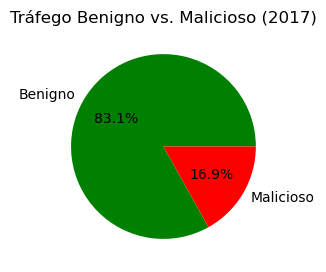

In [18]:
df_2017['Ataques'] = df_2017['Tipos de Ataques'].apply(lambda x: 'Benigno' if x == 'BENIGN' else 'Malicioso')
df_2017['Ataques'].value_counts().plot.pie(autopct='%1.1f%%', colors=["green", "red"], figsize=(3,3))
plt.title("Tráfego Benigno vs. Malicioso (2017)")
plt.ylabel("")
plt.show()

#### 3. Distribuição da Duração do Fluxo ✅

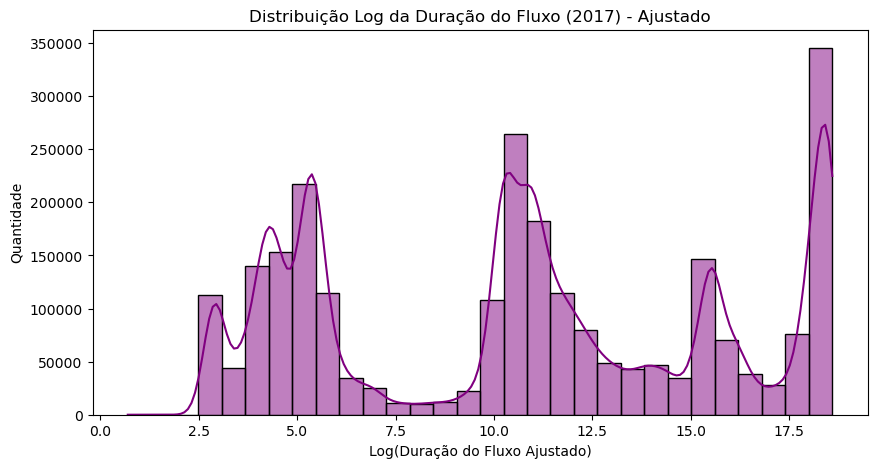

In [26]:
valor_min = abs(df_2017["Flow Duration"].min()) + 1 
df_2017["Flow Duration Ajustado"] = df_2017["Flow Duration"] + valor_min

df_2017["Flow Duration Log"] = np.log1p(df_2017["Flow Duration Ajustado"])

plt.figure(figsize=(10,5))
sns.histplot(df_2017["Flow Duration Log"], bins=30, kde=True, color="purple")
plt.title("Distribuição Log da Duração do Fluxo (2017) - Ajustado")
plt.xlabel("Log(Duração do Fluxo Ajustado)")
plt.ylabel("Quantidade")
plt.show()

#### 4. Duração do Fluxo por Tipo de Tráfego ✅

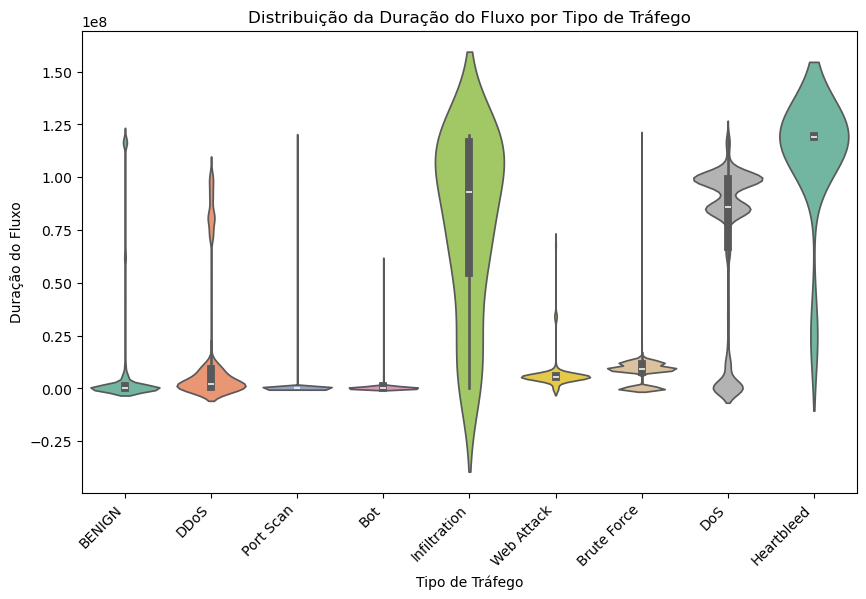

In [30]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Tipos de Ataques', y='Flow Duration', data=df_2017, hue='Tipos de Ataques', palette="Set2", legend=False)
plt.title("Distribuição da Duração do Fluxo por Tipo de Tráfego")
plt.xlabel("Tipo de Tráfego")
plt.ylabel("Duração do Fluxo")

plt.xticks(rotation=45, ha="right")

plt.show()

#### 5. Correlação entre Variáveis Numéricas ✅

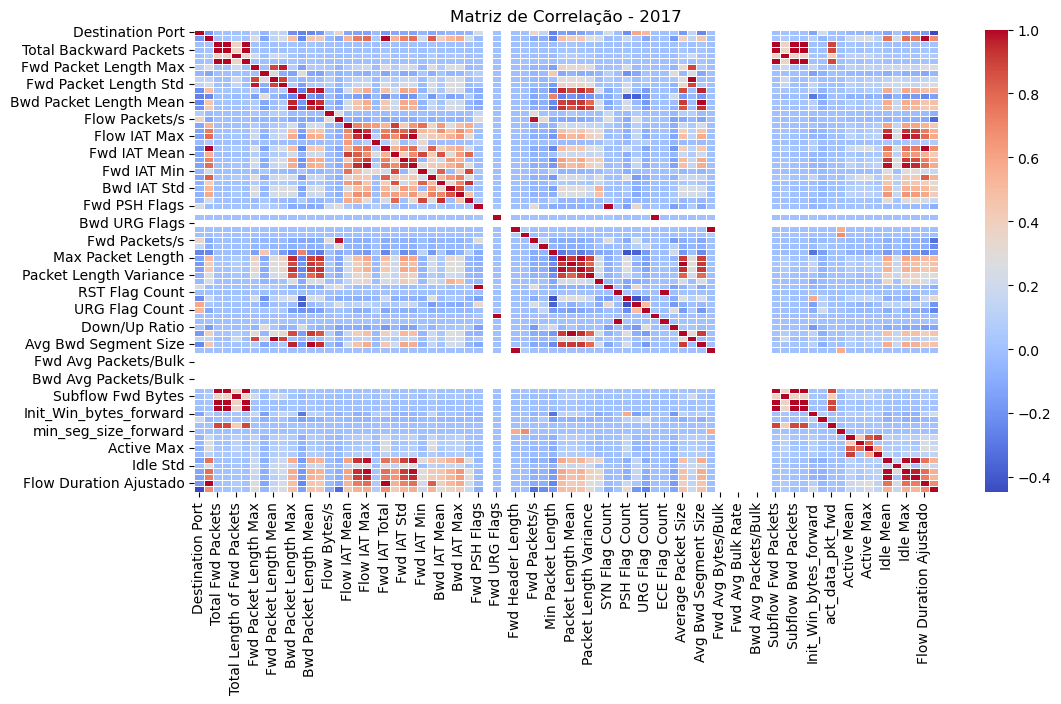

In [32]:
plt.figure(figsize=(12,6))
corr_matrix = df_2017.select_dtypes(include=['number']).corr()
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Matriz de Correlação - 2017")
plt.show()

#### 6. Tipos de Tráfego por Tamanho de Pacote ✅

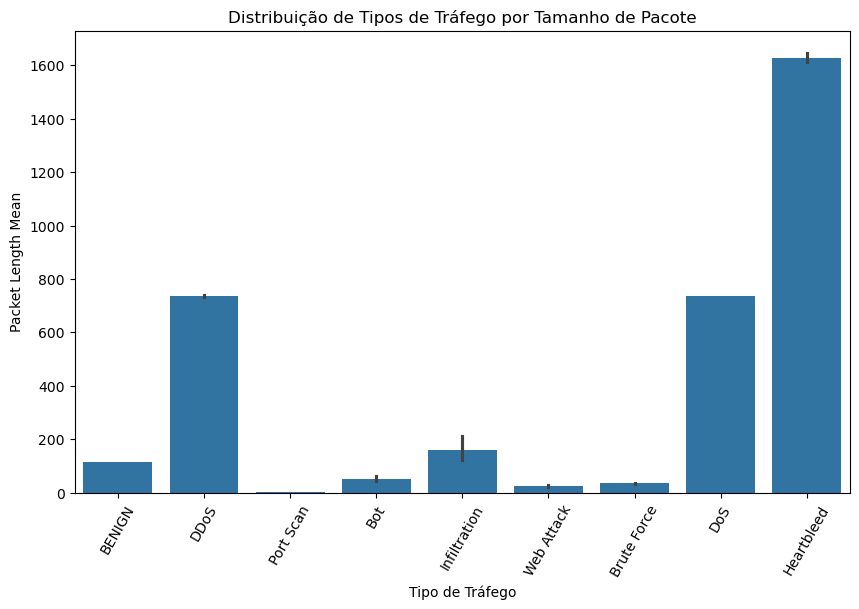

In [34]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Tipos de Ataques', y='Packet Length Mean', data=df_2017)
plt.title('Distribuição de Tipos de Tráfego por Tamanho de Pacote')
plt.xlabel('Tipo de Tráfego')
plt.ylabel('Packet Length Mean')
plt.xticks(rotation=60)
plt.show()

#### 7.  Relação entre Tipos de Ataques ✅

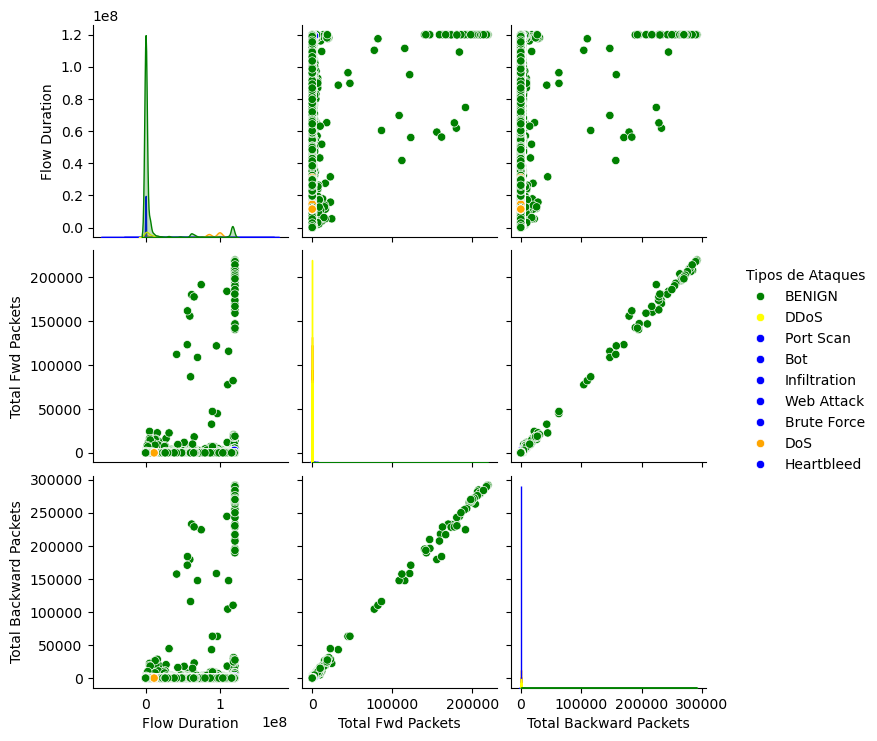

In [38]:
palette_dict = {
    "BENIGN": "green",
    "DoS": "orange",
    "DDoS": "yellow",
    "PortScan": "red",
}

for i in df_2017['Tipos de Ataques'].unique():
    if i not in palette_dict:
        palette_dict[i] = "blue"

sns.pairplot(
    df_2017[['Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Tipos de Ataques']], 
    hue="Tipos de Ataques", diag_kind="kde", palette=palette_dict)
plt.show()

#### 8. Portas de Destino mais Utilizadas ✅

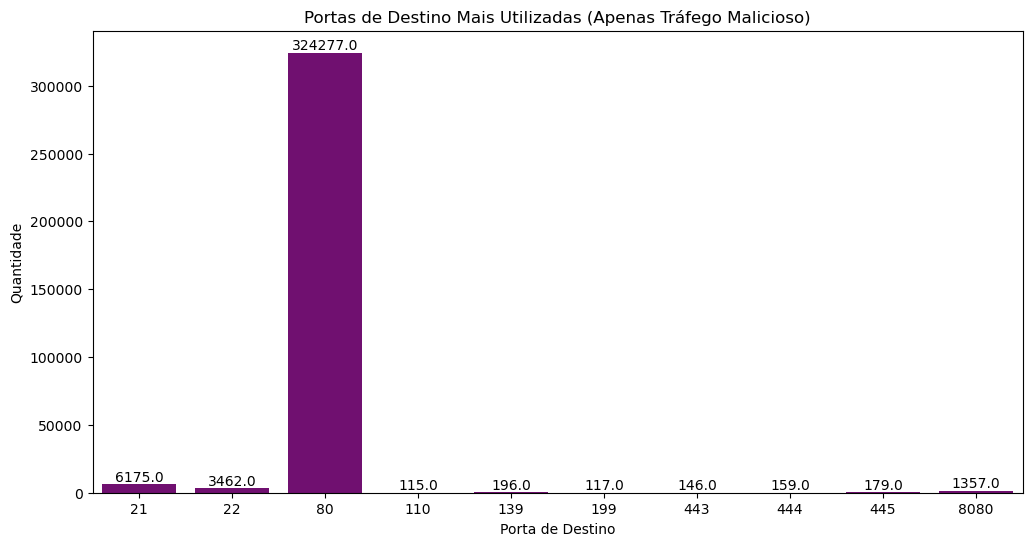

In [42]:
df_malicioso = df_2017[df_2017['Tipos de Ataques'] != 'BENIGN']

plt.figure(figsize=(12,6))
top_ports = df_malicioso['Destination Port'].value_counts().nlargest(10)
ax = sns.barplot(x=top_ports.index, y=top_ports.values, color="purple")

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width()/2, p.get_height()), 
                ha='center', va='bottom', fontsize=10)

plt.title("Portas de Destino Mais Utilizadas (Apenas Tráfego Malicioso)")
plt.xlabel("Porta de Destino")
plt.ylabel("Quantidade")
plt.show()

#### 9. Tamanho Total dos Pacotes Encaminhados ✅

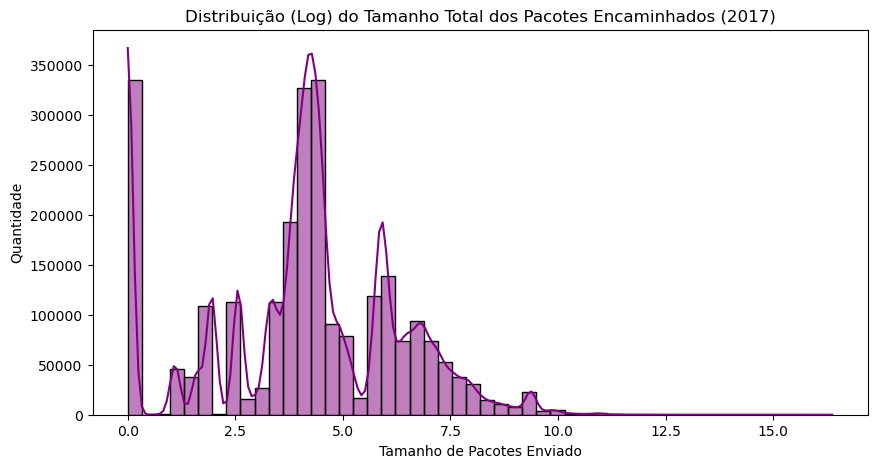

In [44]:
plt.figure(figsize=(10,5))
sns.histplot(np.log1p(df_2017["Total Length of Fwd Packets"]), bins=50, kde=True, color="purple")
plt.title("Distribuição (Log) do Tamanho Total dos Pacotes Encaminhados (2017)")
plt.xlabel("Tamanho de Pacotes Enviado")
plt.ylabel("Quantidade")
plt.show()

### Dataset 2018

In [3]:
path_2018_1 = r"C:\Users\augus\Capstone-Data-Science-Project\dados\processados\IDS-2018-1-PROCESSADO.csv"
path_2018_2 = r"C:\Users\augus\Capstone-Data-Science-Project\dados\processados\IDS-2018-2-PROCESSADO.csv"
path_2018_3 = r"C:\Users\augus\Capstone-Data-Science-Project\dados\processados\IDS-2018-3-PROCESSADO.csv"
df_2018_1 = pd.read_csv(path_2018_1, low_memory=False)
df_2018_2 = pd.read_csv(path_2018_2, low_memory=False)
df_2018_3 = pd.read_csv(path_2018_3, low_memory=False)

In [5]:
print(df_2018_1.dtypes)

Dst Port              int64
Protocol              int64
Timestamp            object
Flow Duration         int64
Tot Fwd Pkts          int64
                     ...   
Idle Mean           float64
Idle Std            float64
Idle Max              int64
Idle Min              int64
Tipos de Ataques     object
Length: 80, dtype: object


#### 1. Ataques mais Frequentes ✅

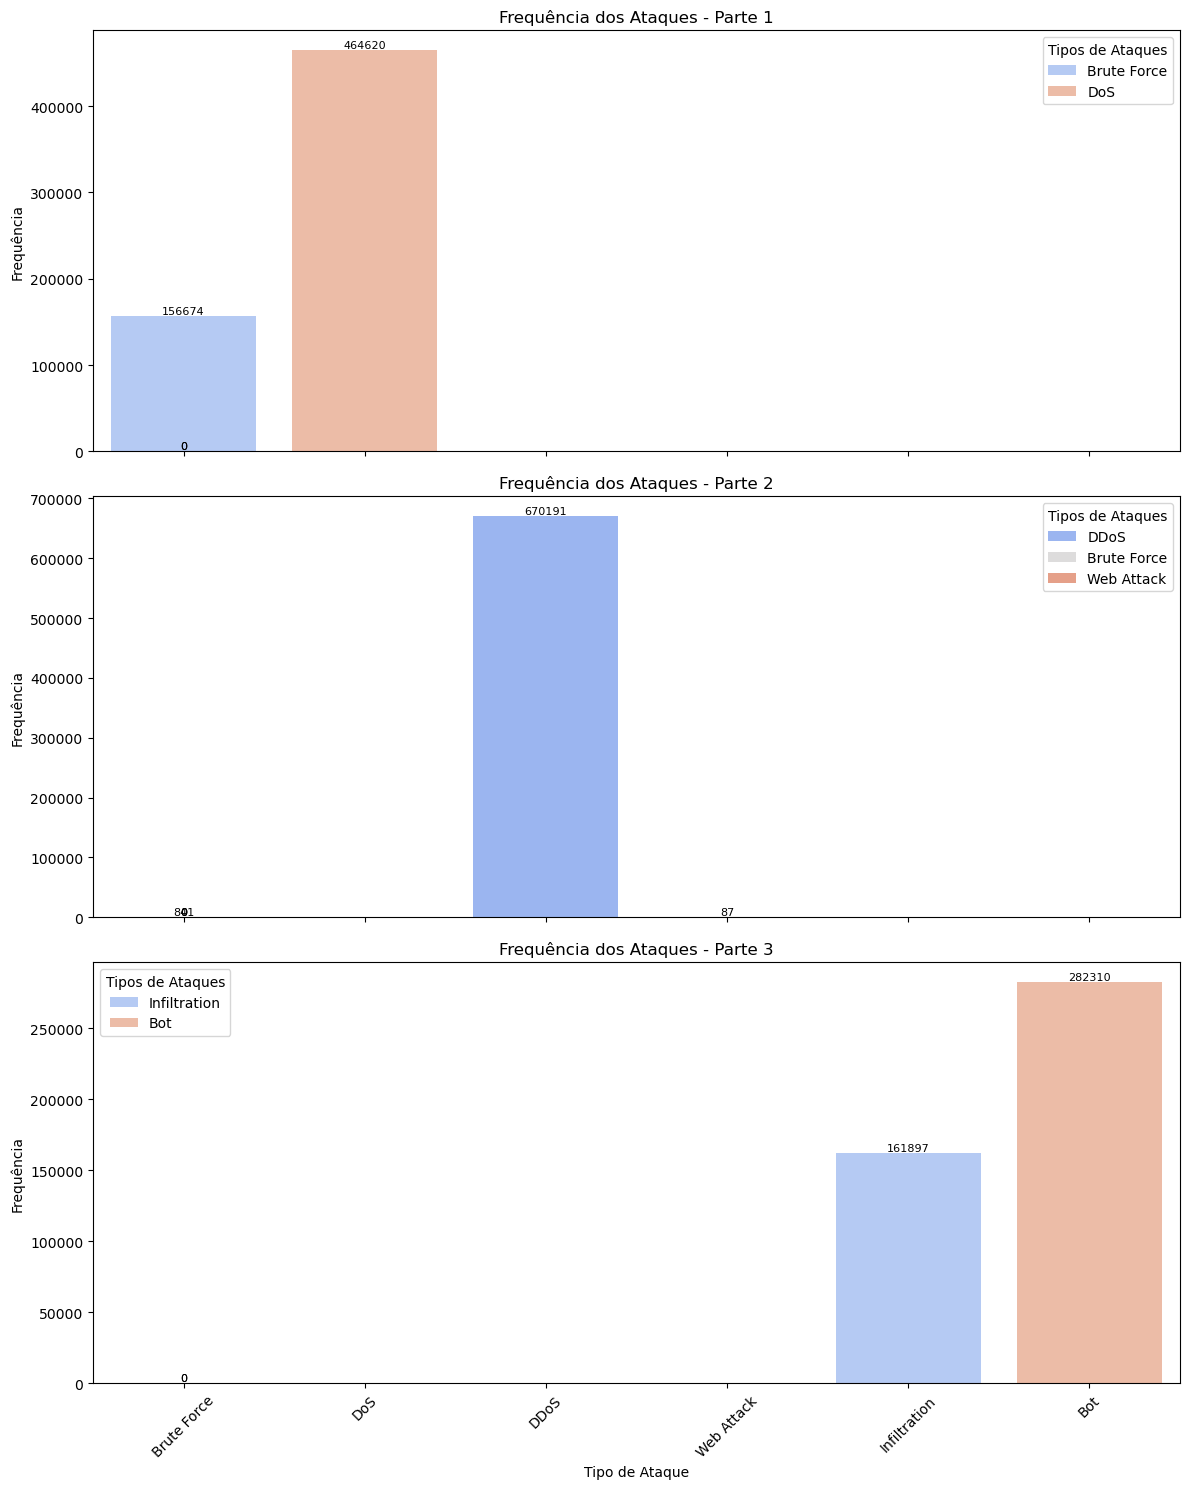

In [16]:
fig, axes = plt.subplots(3, 1, figsize=(12, 15), sharex=True)

for i, (df, title) in enumerate(zip([df_2018_1, df_2018_2, df_2018_3], ['Parte 1', 'Parte 2', 'Parte 3'])):
    df_filtered = df[~df["Tipos de Ataques"].str.contains("Benign", case=False, na=False)]

    ax = sns.countplot(x="Tipos de Ataques", data=df_filtered, hue="Tipos de Ataques", palette="coolwarm", ax=axes[i], legend=True) 
    axes[i].set_title(f"Frequência dos Ataques - {title}")
    axes[i].set_ylabel("Frequência")
    axes[i].tick_params(axis='x', rotation=45)
    
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.xlabel("Tipo de Ataque")
plt.ylabel("Frequência")
plt.show()

#### 2. Tráfego Benigno vs. Malicioso ✅

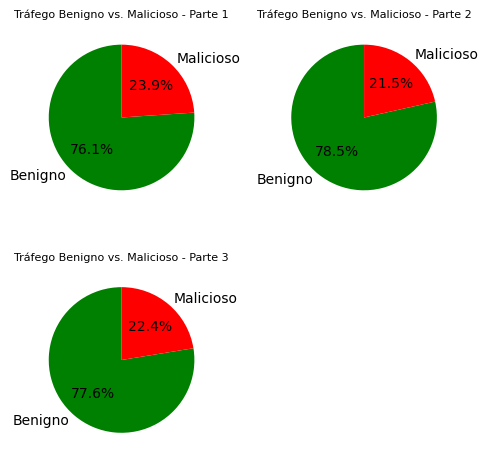

In [20]:
fig, axes = plt.subplots(2, 2, figsize=(5, 5))

ax1, ax2, ax3, _ = axes.flatten() 

dfs = [df_2018_1, df_2018_2, df_2018_3]
titles = ['Parte 1', 'Parte 2', 'Parte 3']
axs = [ax1, ax2, ax3]

for df, title, ax in zip(dfs, titles, axs):
    df['Tipos de Ataques'] = df['Tipos de Ataques'].str.strip().str.upper()
    df['Ataques'] = df['Tipos de Ataques'].apply(lambda x: 'Benigno' if x == 'BENIGN' else 'Malicioso')

    df['Ataques'].value_counts().plot.pie(
        autopct='%1.1f%%', colors=["green", "red"], ax=ax, startangle=90
    )

    ax.set_title(f"Tráfego Benigno vs. Malicioso - {title}", fontsize = 8)
    ax.set_ylabel("")

fig.delaxes(axes[1, 1])

plt.tight_layout()
plt.show()

#### 3. Distribuição da Duração do Fluxo ✅

##### Dataset 01

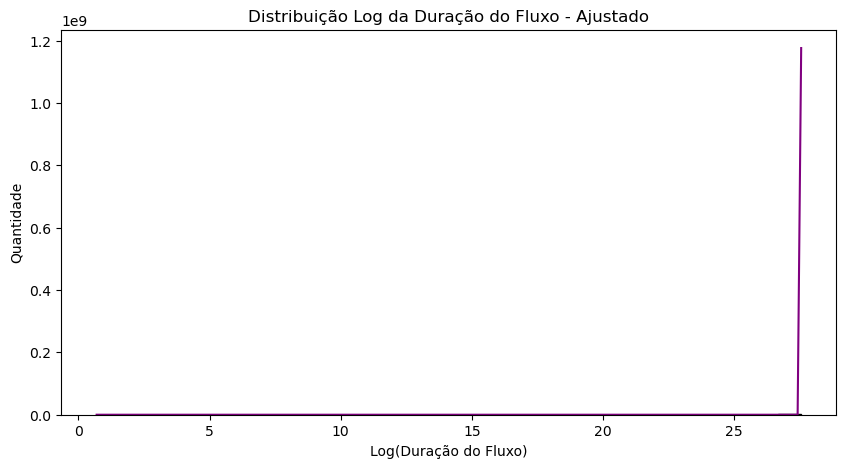

In [7]:
valor_min = abs(df_2018_1["Flow Duration"].min()) + 1
df_2018_1["Flow Duration Adjusted"] = df_2018_1["Flow Duration"] + valor_min

df_2018_1["Flow Duration Log"] = np.log1p(df_2018_1["Flow Duration Adjusted"])

plt.figure(figsize=(10,5))
sns.histplot(df_2018_1["Flow Duration Log"], bins=30, kde=True, color="purple")
plt.title("Distribuição Log da Duração do Fluxo - Ajustado")
plt.xlabel("Log(Duração do Fluxo)")
plt.ylabel("Quantidade")
plt.show()

##### Dataset 02

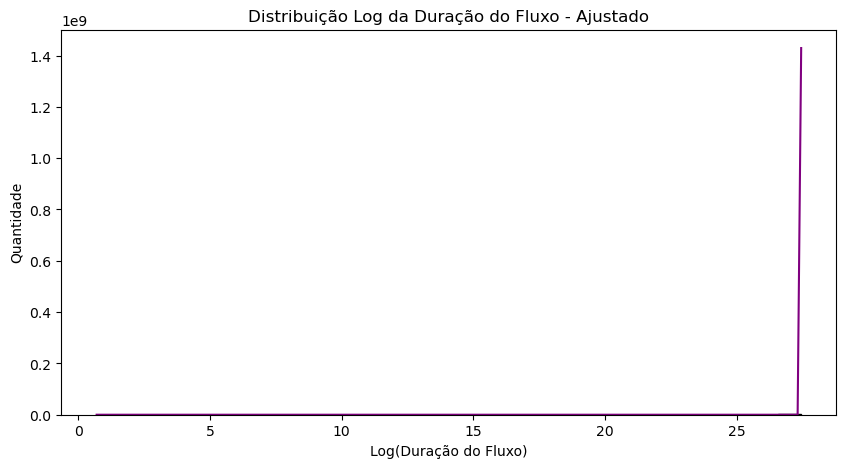

In [19]:
valor_min = abs(df_2018_2["Flow Duration"].min()) + 1
df_2018_2["Flow Duration Adjusted"] = df_2018_2["Flow Duration"] + valor_min

df_2018_2["Flow Duration Log"] = np.log1p(df_2018_2["Flow Duration Adjusted"])

plt.figure(figsize=(10,5))
sns.histplot(df_2018_2["Flow Duration Log"], bins=30, kde=True, color="purple")
plt.title("Distribuição Log da Duração do Fluxo - Ajustado")
plt.xlabel("Log(Duração do Fluxo)")
plt.ylabel("Quantidade")
plt.show()

##### Dataset 03

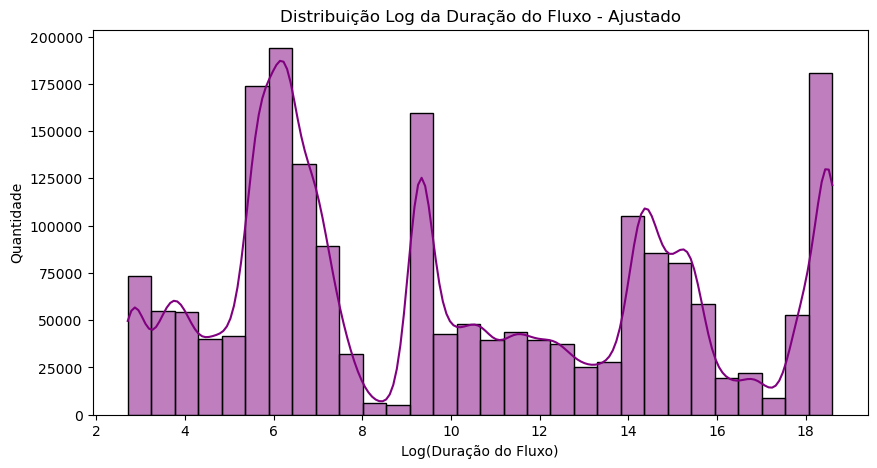

In [93]:
valor_min = abs(df_2018_3["Flow Duration"].min()) + 1
df_2018_3["Flow Duration Adjusted"] = df_2018_3["Flow Duration"] + valor_min

df_2018_3["Flow Duration Log"] = np.log1p(df_2018_3["Flow Duration Adjusted"])

plt.figure(figsize=(10,5))
sns.histplot(df_2018_3["Flow Duration Log"], bins=30, kde=True, color="purple")
plt.title("Distribuição Log da Duração do Fluxo - Ajustado")
plt.xlabel("Log(Duração do Fluxo)")
plt.ylabel("Quantidade")
plt.show()

#### 4. Duração do Fluxo por Tipo de Tráfego ✅

##### Dataset 01

C:\Users\augus\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


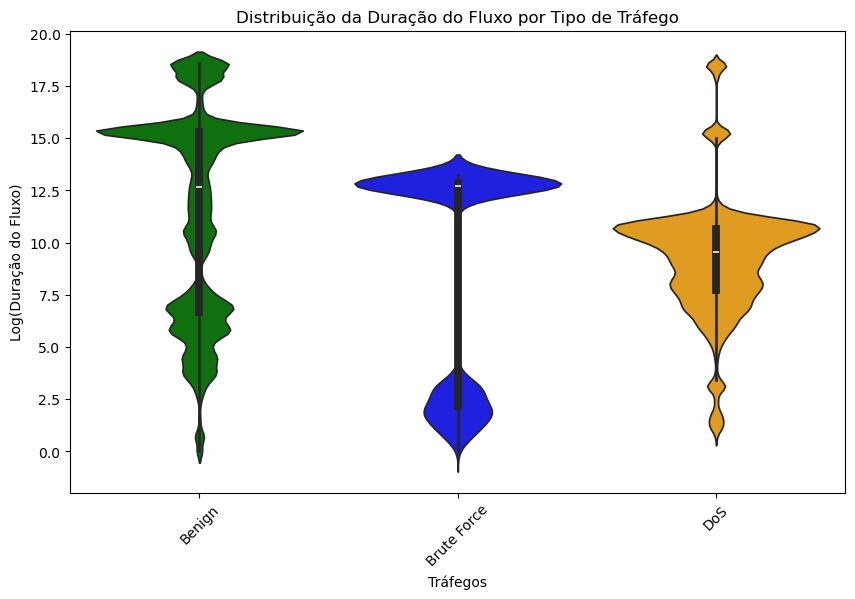

In [46]:
palette_dict = {
    "Benign": "green",
    "DoS": "orange",
    "Bruteforce": "yellow",
}

for i in df_2018_1['Tipos de Ataques'].unique():
    if i not in palette_dict:
        palette_dict[i] = "blue"

df_2018_1["Flow Duration Log"] = np.log1p(df_2018_1["Flow Duration"])

plt.figure(figsize=(10,6))
sns.violinplot(x="Tipos de Ataques", y="Flow Duration Log", data=df_2018_1, hue="Tipos de Ataques", 
               palette=palette_dict, legend=False) 

plt.title("Distribuição da Duração do Fluxo por Tipo de Tráfego")
plt.xticks(rotation=45)
plt.xlabel("Tráfegos")
plt.ylabel("Log(Duração do Fluxo)")
plt.show()

##### Dataset 02

C:\Users\augus\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


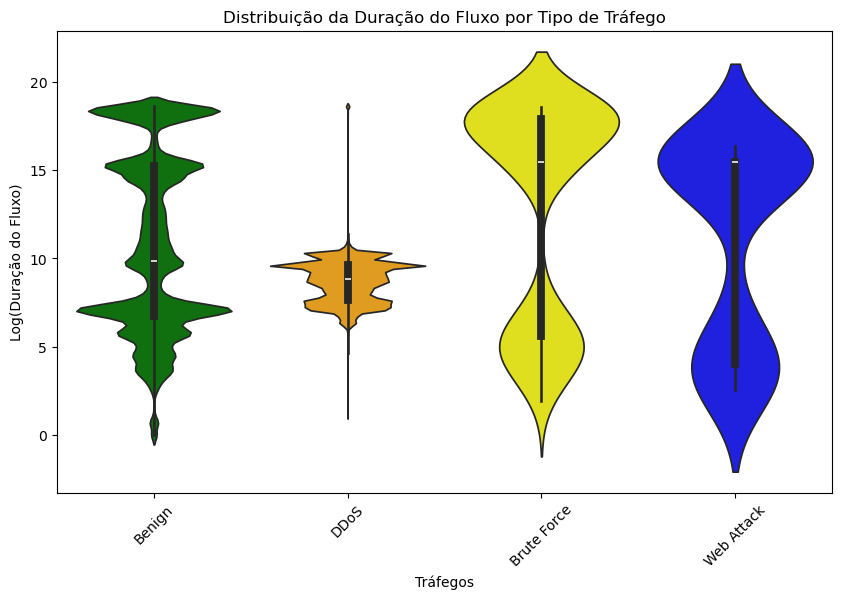

In [48]:
palette_dict = {
    "Benign": "green",
    "DDoS": "orange",
    "Brute Force": "yellow",
}

for i in df_2018_2['Tipos de Ataques'].unique():
    if i not in palette_dict:
        palette_dict[i] = "blue"

df_2018_2["Flow Duration Log"] = np.log1p(df_2018_2["Flow Duration"])

plt.figure(figsize=(10,6))
sns.violinplot(x="Tipos de Ataques", y="Flow Duration Log", data=df_2018_2, hue="Tipos de Ataques", 
               palette=palette_dict, legend=False) 

plt.title("Distribuição da Duração do Fluxo por Tipo de Tráfego")
plt.xticks(rotation=45)
plt.xlabel("Tráfegos")
plt.ylabel("Log(Duração do Fluxo)")
plt.show()

##### Dataset 03

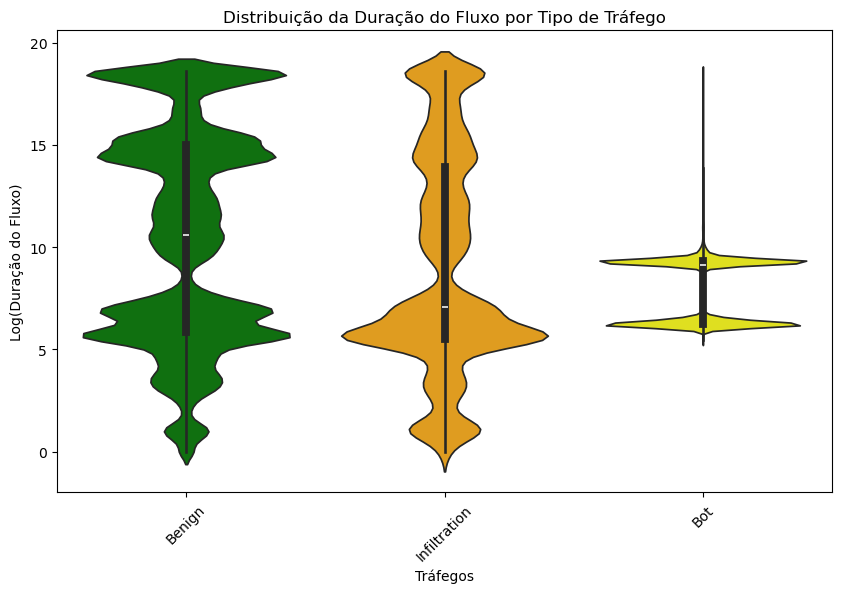

In [50]:
palette_dict = {
    "Benign": "green",
    "Infiltration": "orange",
    "Bot": "yellow",
}

for label in df_2018_3['Tipos de Ataques'].unique():
    if label not in palette_dict:
        palette_dict[label] = "blue"

df_2018_3["Flow Duration Log"] = np.log1p(df_2018_3["Flow Duration"])

plt.figure(figsize=(10,6))
sns.violinplot(x="Tipos de Ataques", y="Flow Duration Log", data=df_2018_3, hue="Tipos de Ataques", 
               palette=palette_dict, legend=False) 

plt.title("Distribuição da Duração do Fluxo por Tipo de Tráfego")
plt.xticks(rotation=45)
plt.xlabel("Tráfegos")
plt.ylabel("Log(Duração do Fluxo)")
plt.show()

#### 5. Correlação entre Variáveis Numéricas ✅

##### Todos os Datasets

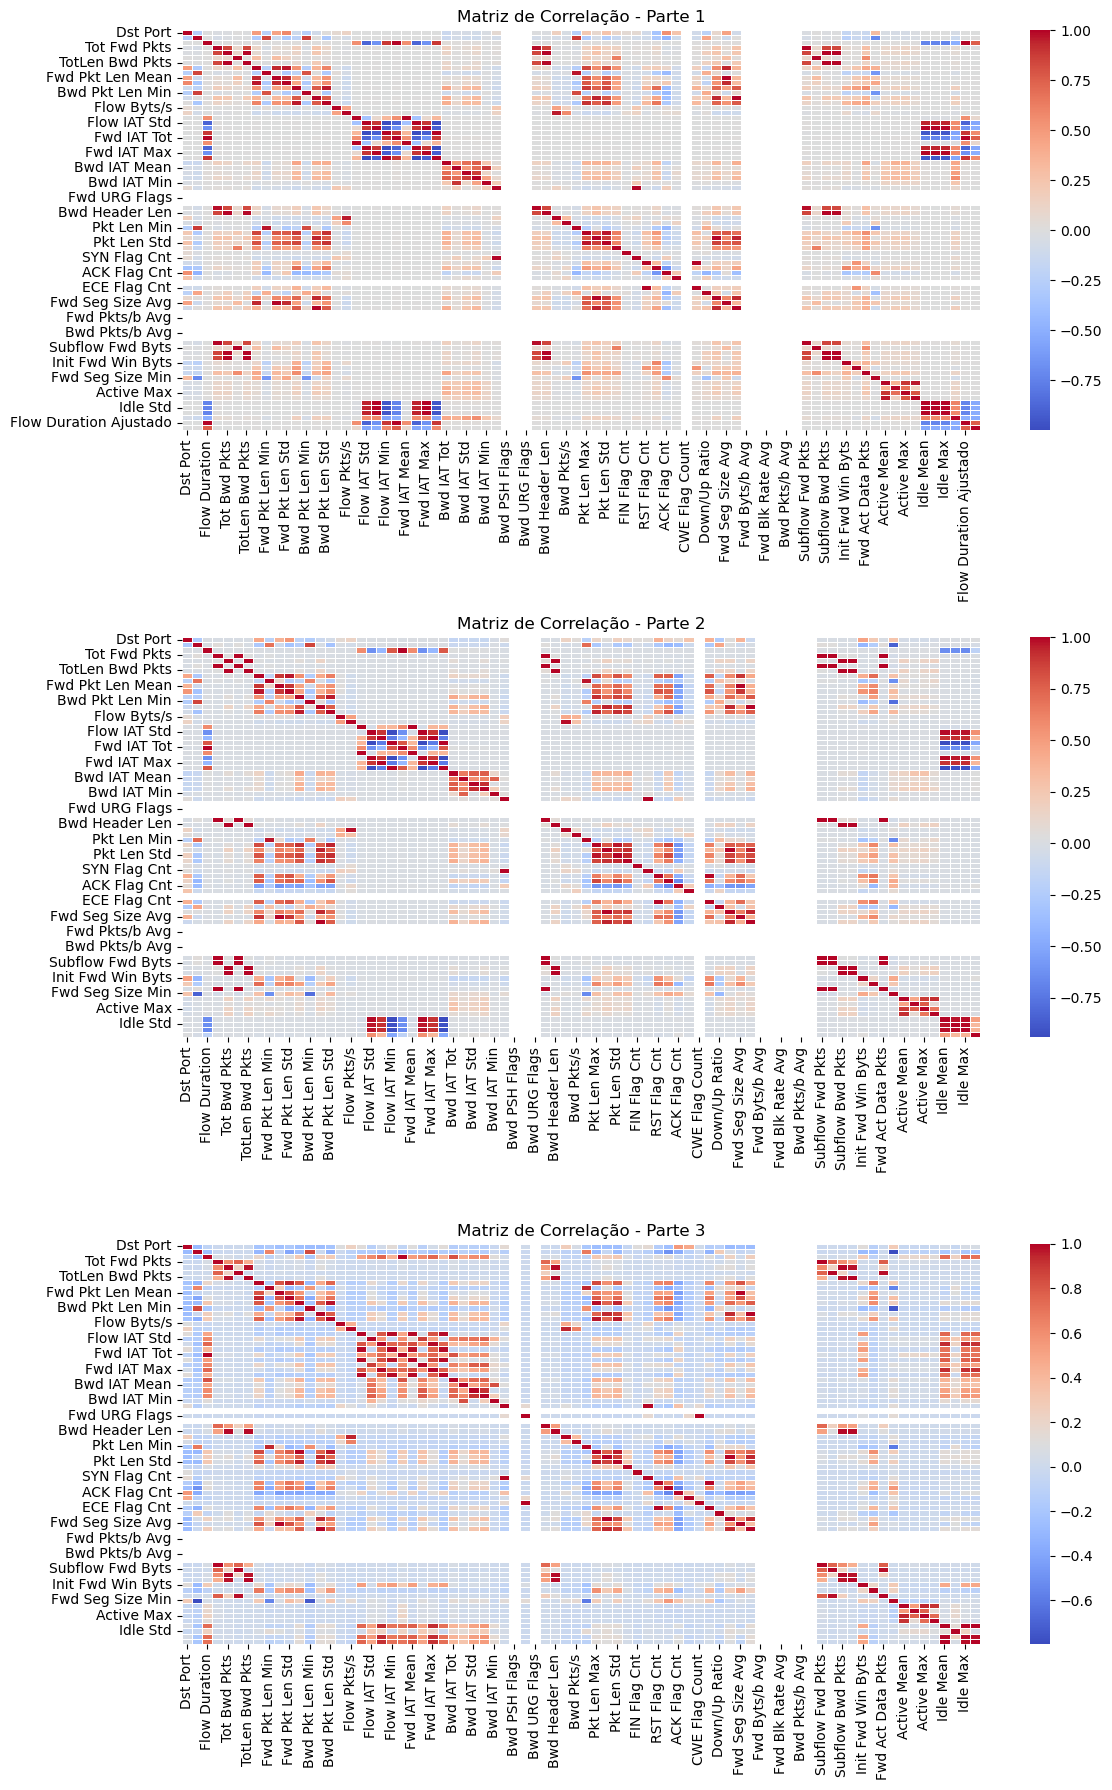

In [14]:
dfs = [df_2018_1, df_2018_2, df_2018_3]
titles = ["Matriz de Correlação - Parte 1", "Matriz de Correlação - Parte 2", "Matriz de Correlação - Parte 3"]

plt.figure(figsize=(12, 18))

for i, (df, title) in enumerate(zip(dfs, titles), 1):
    plt.subplot(3, 1, i)
    corr_matrix = df.select_dtypes(include=['number']).corr()
    sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", linewidths=0.5)
    plt.title(title)

plt.tight_layout()
plt.show()

##### Dataset 01

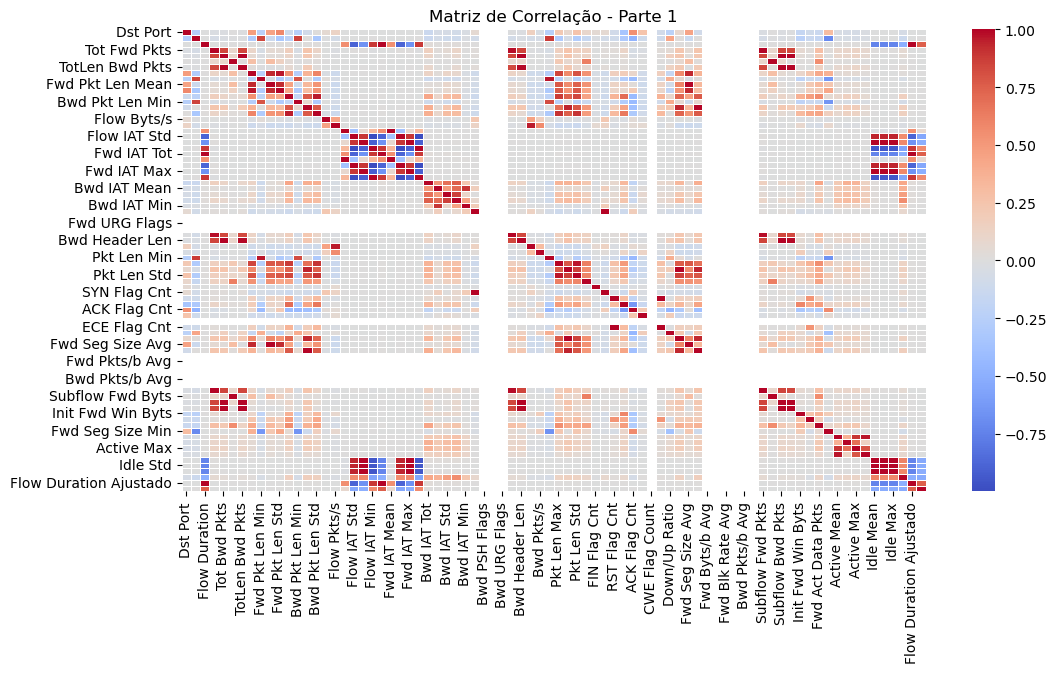

In [16]:
plt.figure(figsize=(12,6))
corr_matrix = df_2018_1.select_dtypes(include=['number']).corr()
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Matriz de Correlação - Parte 1")
plt.show()

##### Dataset 02

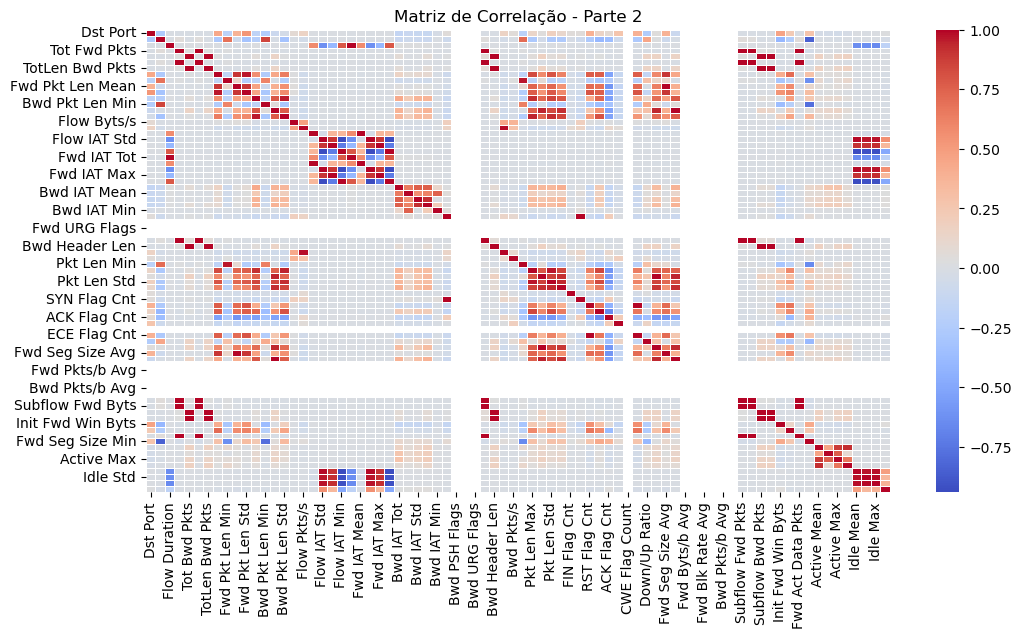

In [17]:
plt.figure(figsize=(12,6))
corr_matrix = df_2018_2.select_dtypes(include=['number']).corr()
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Matriz de Correlação - Parte 2")
plt.show()

##### Dataset 03

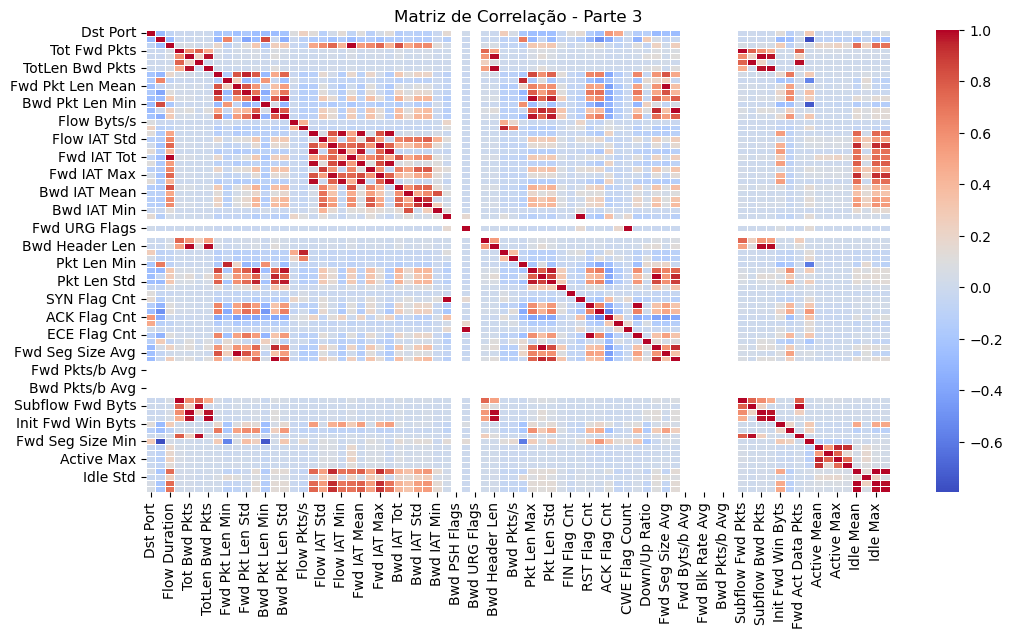

In [18]:
plt.figure(figsize=(12,6))
corr_matrix = df_2018_3.select_dtypes(include=['number']).corr()
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Matriz de Correlação - Parte 3")
plt.show()

#### 6. Tipos de Tráfego por Protocolo ✅

##### Dataset 01

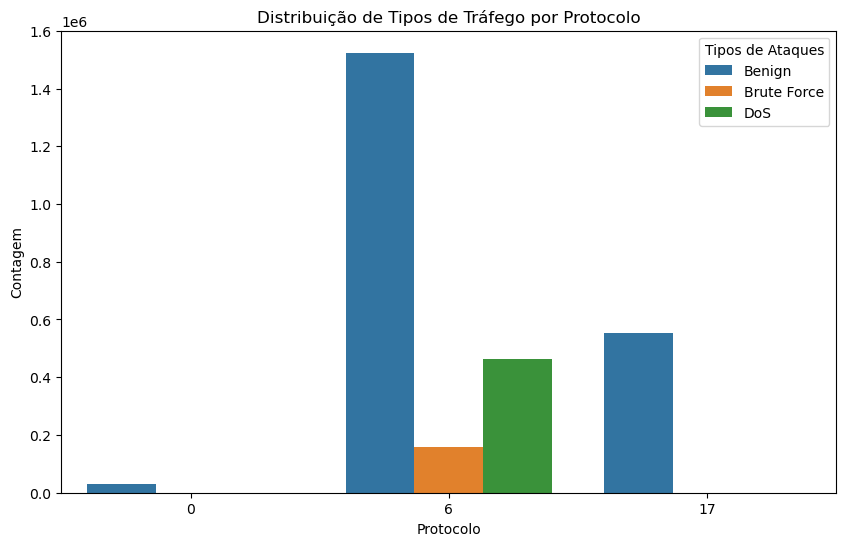

In [24]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Protocol', hue='Tipos de Ataques', data=df_2018_1)
plt.title('Distribuição de Tipos de Tráfego por Protocolo')
plt.xlabel('Protocolo')
plt.ylabel('Contagem')
plt.show()

##### Dataset 02

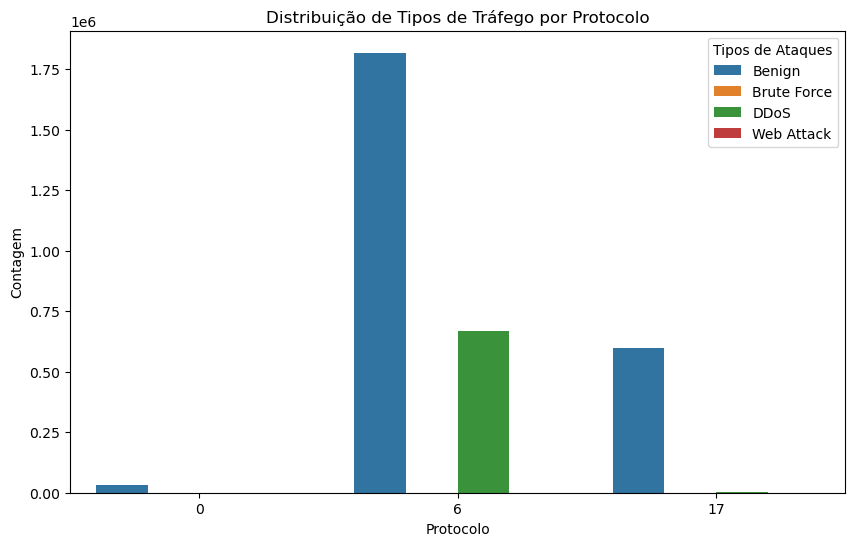

In [26]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Protocol', hue='Tipos de Ataques', data=df_2018_2)
plt.title('Distribuição de Tipos de Tráfego por Protocolo')
plt.xlabel('Protocolo')
plt.ylabel('Contagem')
plt.show()

##### Dataset 03

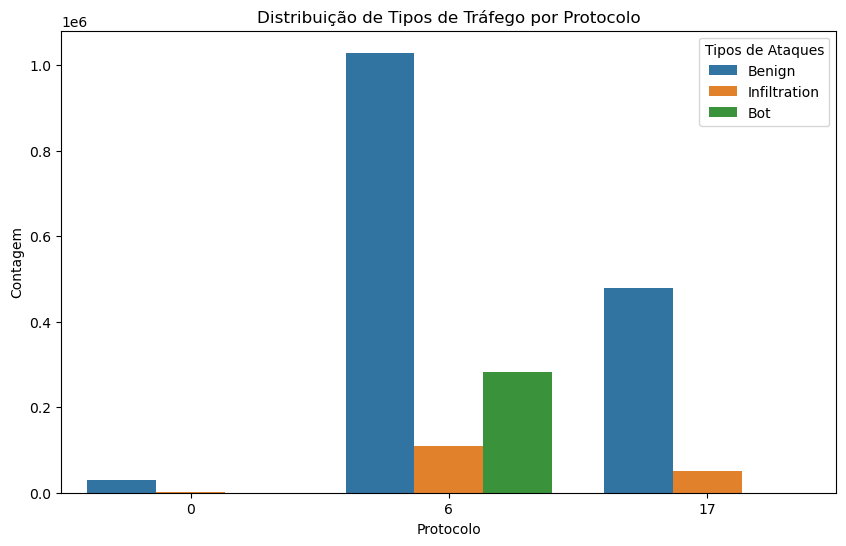

In [27]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Protocol', hue='Tipos de Ataques', data=df_2018_3)
plt.title('Distribuição de Tipos de Tráfego por Protocolo')
plt.xlabel('Protocolo')
plt.ylabel('Contagem')
plt.show()

#### 7. Relação entre Tipos de Ataques ✅

##### Dataset 01

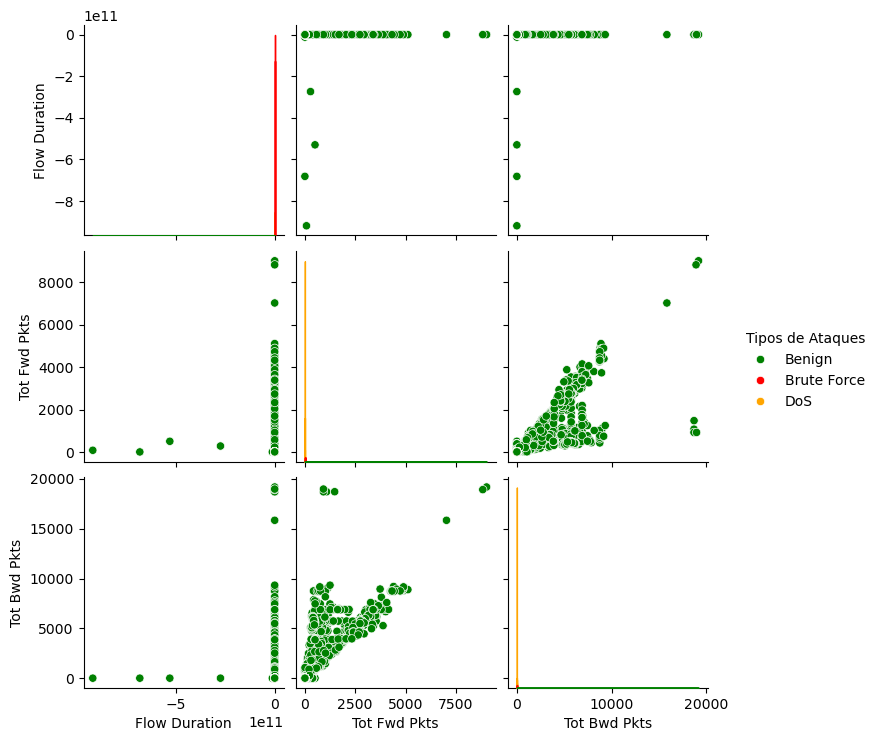

In [30]:
palette_dict = {
    "Benign": "green",
    "DoS": "orange",
    "Brute Force": "red",
}

for i in df_2018_1['Tipos de Ataques'].unique():
    if i not in palette_dict:
        palette_dict[i] = "blue"

sns.pairplot(
    df_2018_1[['Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts', 'Tipos de Ataques']], 
    hue="Tipos de Ataques", diag_kind="kde", palette=palette_dict)
plt.show()

##### Dataset 02

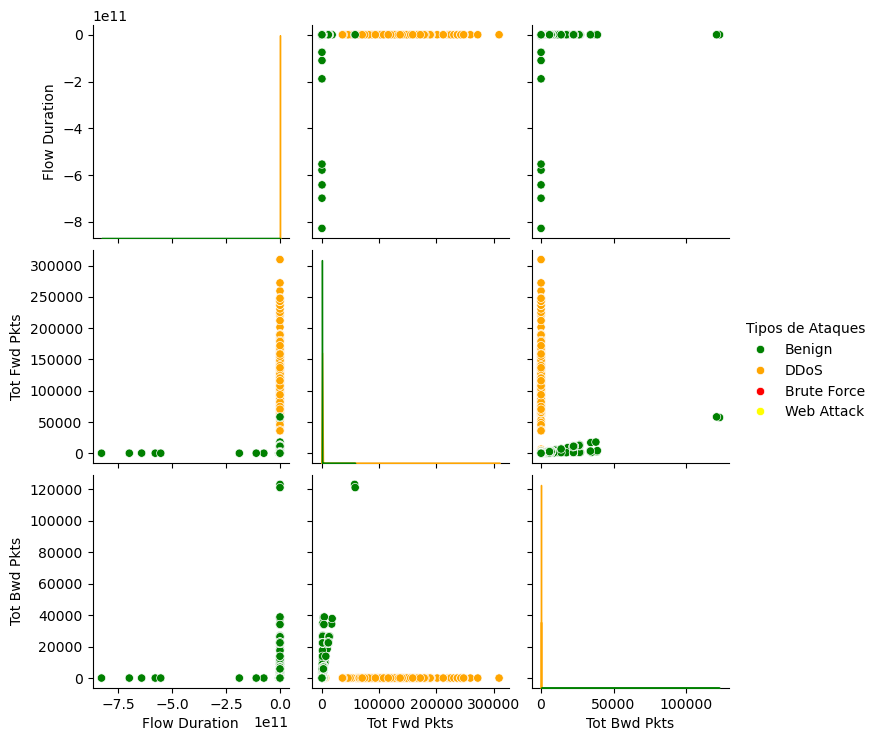

In [31]:
palette_dict = {
    "Benign": "green",
    "DDoS": "orange",
    "Brute Force": "red",
    "Web Attack": "yellow",
}

for i in df_2018_2['Tipos de Ataques'].unique():
    if i not in palette_dict:
        palette_dict[i] = "blue"

sns.pairplot(
    df_2018_2[['Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts', 'Tipos de Ataques']], 
    hue="Tipos de Ataques", diag_kind="kde", palette=palette_dict)
plt.show()

##### Dataset 03

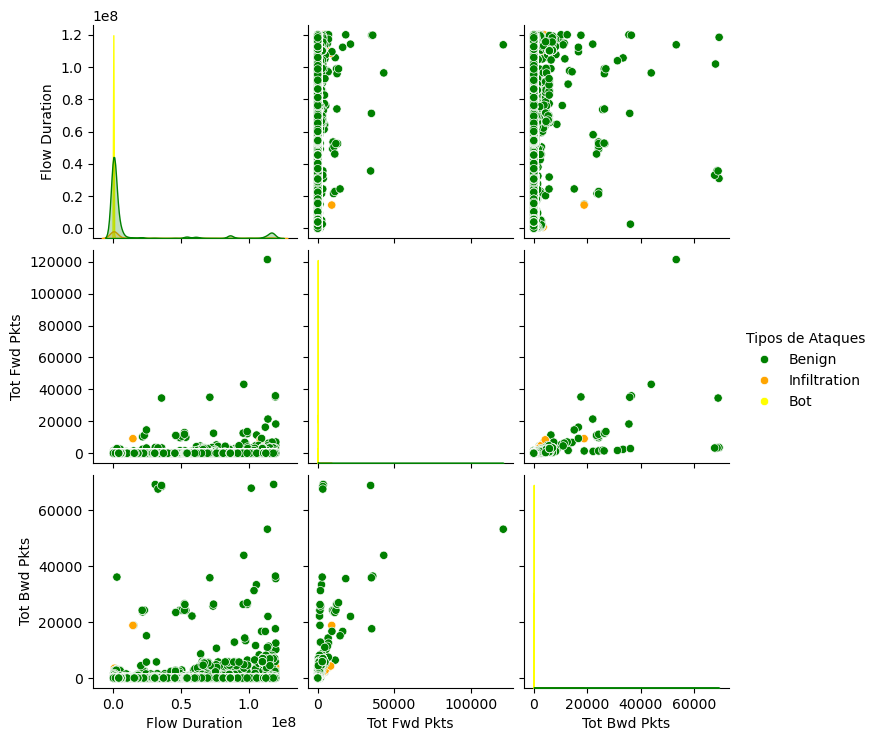

In [32]:
palette_dict = {
    "Benign": "green",
    "Infiltration": "orange",
    "Bot": "yellow",
}

for i in df_2018_3['Tipos de Ataques'].unique():
    if i not in palette_dict:
        palette_dict[i] = "blue"

sns.pairplot(
    df_2018_3[['Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts', 'Tipos de Ataques']], 
    hue="Tipos de Ataques", diag_kind="kde", palette=palette_dict)
plt.show()

#### 8. Portas de Destino mais Utilizadas em Ataques ✅

##### Dataset 01

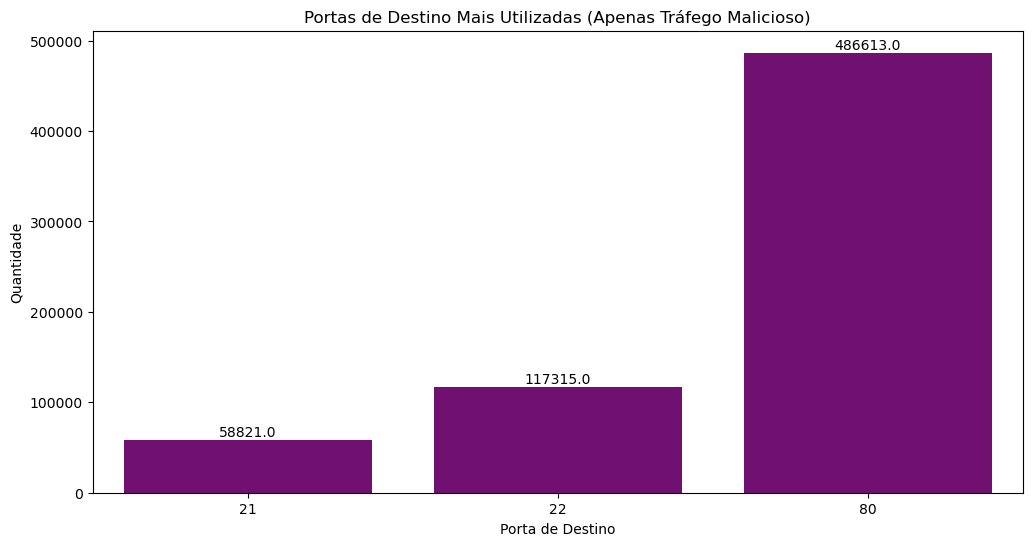

In [42]:
df_malicioso = df_2018_1[df_2018_1['Tipos de Ataques'] != 'Benign']

plt.figure(figsize=(12,6))
top_ports = df_malicioso['Dst Port'].value_counts().nlargest(10)
ax = sns.barplot(x=top_ports.index, y=top_ports.values, color="purple")

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width()/2, p.get_height()), 
                ha='center', va='bottom', fontsize=10)

plt.title("Portas de Destino Mais Utilizadas (Apenas Tráfego Malicioso)")
plt.xlabel("Porta de Destino")
plt.ylabel("Quantidade")
plt.show()

##### Dataset 02

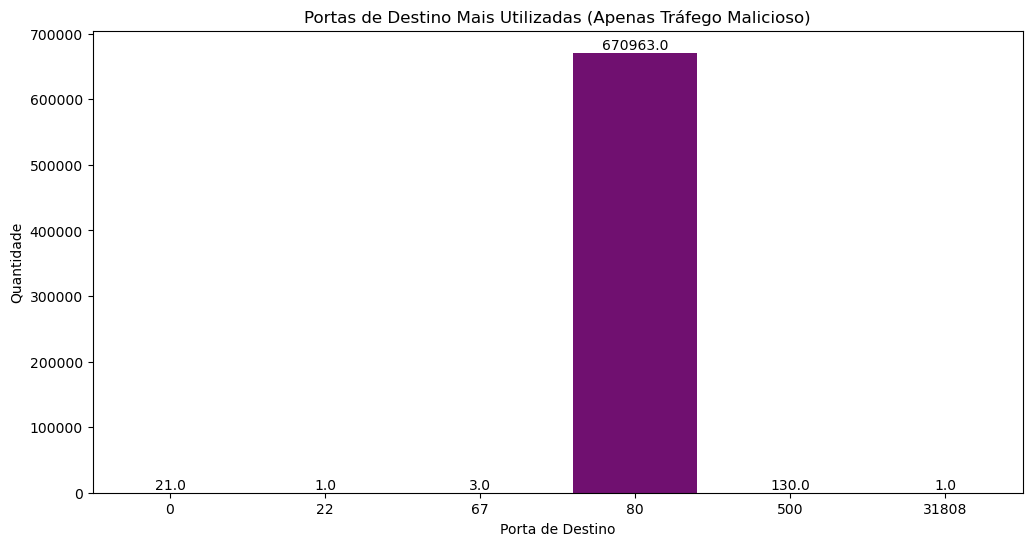

In [40]:
df_malicioso = df_2018_2[df_2018_2['Tipos de Ataques'] != 'Benign']

plt.figure(figsize=(12,6))
top_ports = df_malicioso['Dst Port'].value_counts().nlargest(10)
ax = sns.barplot(x=top_ports.index, y=top_ports.values, color="purple")

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width()/2, p.get_height()), 
                ha='center', va='bottom', fontsize=10)

plt.title("Portas de Destino Mais Utilizadas (Apenas Tráfego Malicioso)")
plt.xlabel("Porta de Destino")
plt.ylabel("Quantidade")
plt.show()

##### Dataset 03

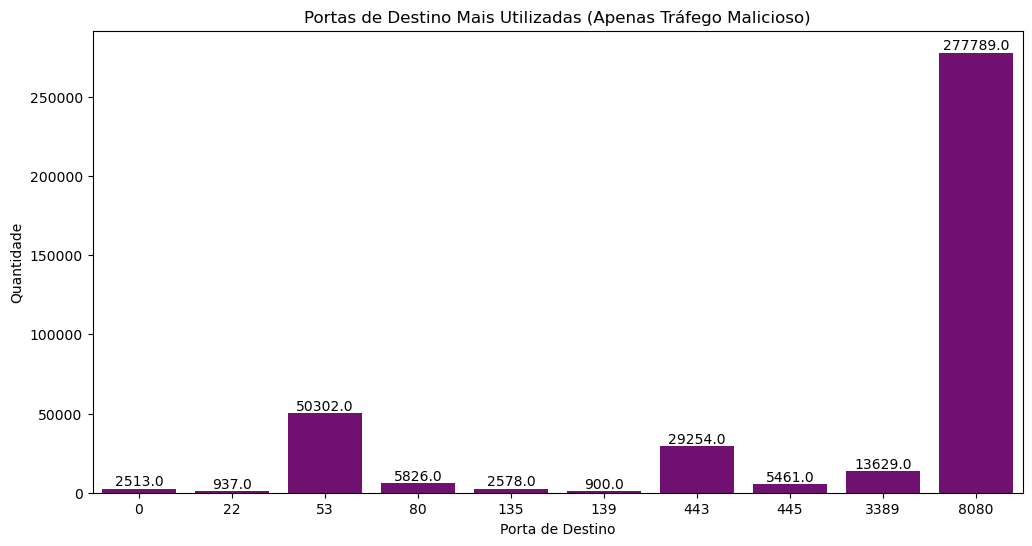

In [44]:
df_malicioso = df_2018_3[df_2018_3['Tipos de Ataques'] != 'Benign']

plt.figure(figsize=(12,6))
top_ports = df_malicioso['Dst Port'].value_counts().nlargest(10)
ax = sns.barplot(x=top_ports.index, y=top_ports.values, color="purple")

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width()/2, p.get_height()), 
                ha='center', va='bottom', fontsize=10)

plt.title("Portas de Destino Mais Utilizadas (Apenas Tráfego Malicioso)")
plt.xlabel("Porta de Destino")
plt.ylabel("Quantidade")
plt.show()

#### 9. Tamanho Total dos Pacotes Encaminhados ✅

##### Dataset 01

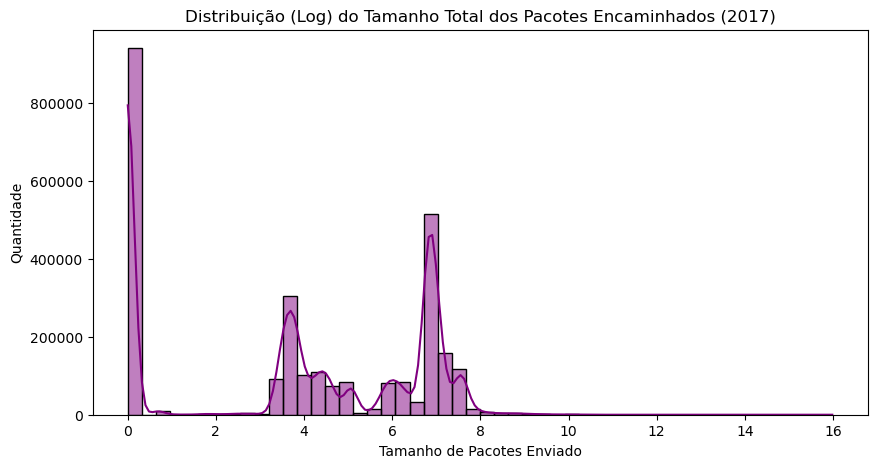

In [54]:
plt.figure(figsize=(10,5))
sns.histplot(np.log1p(df_2018_1["TotLen Fwd Pkts"]), bins=50, kde=True, color="purple")
plt.title("Distribuição (Log) do Tamanho Total dos Pacotes Encaminhados (2017)")
plt.xlabel("Tamanho de Pacotes Enviado")
plt.ylabel("Quantidade")
plt.show()

##### Dataset 02

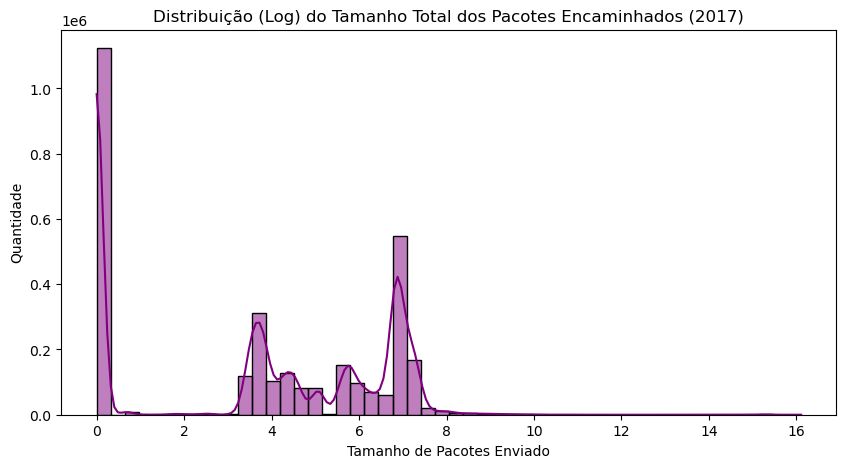

In [53]:
plt.figure(figsize=(10,5))
sns.histplot(np.log1p(df_2018_2["TotLen Fwd Pkts"]), bins=50, kde=True, color="purple")
plt.title("Distribuição (Log) do Tamanho Total dos Pacotes Encaminhados (2017)")
plt.xlabel("Tamanho de Pacotes Enviado")
plt.ylabel("Quantidade")
plt.show()

##### Dataset 03

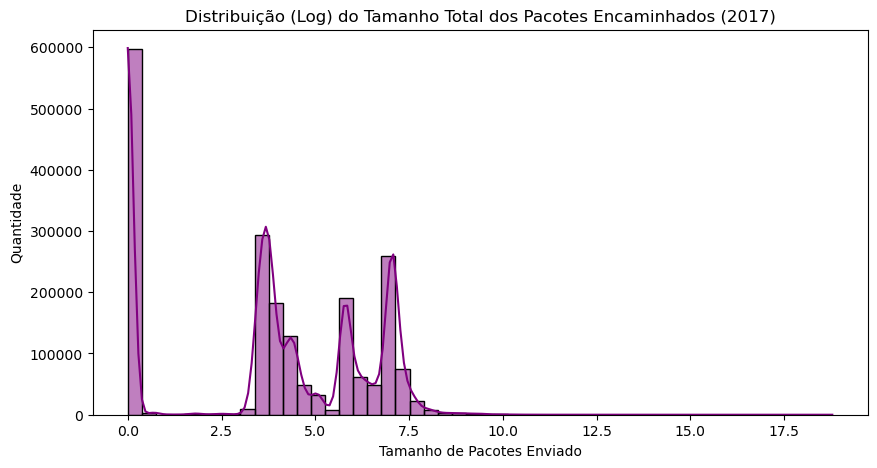

In [55]:
plt.figure(figsize=(10,5))
sns.histplot(np.log1p(df_2018_3["TotLen Fwd Pkts"]), bins=50, kde=True, color="purple")
plt.title("Distribuição (Log) do Tamanho Total dos Pacotes Encaminhados (2017)")
plt.xlabel("Tamanho de Pacotes Enviado")
plt.ylabel("Quantidade")
plt.show()